In [4]:
import pandas as pd

url = "D:\JN\Student_Performance_Prediction\student-mat.csv"
df = pd.read_csv(url, sep=';')
print(df.head())
print(df.info())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

<>:3: SyntaxWarning: "\J" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\J"? A raw string is also an option.
<>:3: SyntaxWarning: "\J" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\J"? A raw string is also an option.
C:\Users\DELL\AppData\Local\Temp\ipykernel_13328\1751196780.py:3: SyntaxWarning: "\J" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\J"? A raw string is also an option.
  url = "D:\JN\Student_Performance_Prediction\student-mat.csv"


In [6]:
import pandas as pd

url = "D:\JN\Student_Performance_Prediction\student-por.csv"
df = pd.read_csv(url, sep=';')
print(df.head())
print(df.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (to

<>:3: SyntaxWarning: "\J" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\J"? A raw string is also an option.
<>:3: SyntaxWarning: "\J" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\J"? A raw string is also an option.
C:\Users\DELL\AppData\Local\Temp\ipykernel_13328\1362836578.py:3: SyntaxWarning: "\J" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\J"? A raw string is also an option.
  url = "D:\JN\Student_Performance_Prediction\student-por.csv"


In [8]:
# Select key features for prediction
features = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2']
target = 'G3'

X = df[features]
y = df[target]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.8634139665476477
Mean Squared Error: 1.3319482045610331


Matplotlib is building the font cache; this may take a moment.


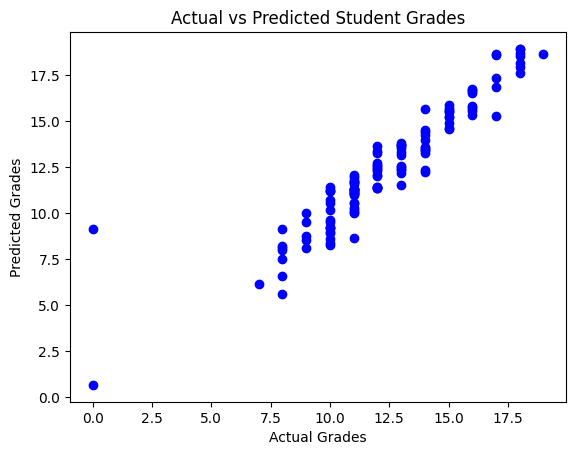

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Student Grades")
plt.show()


In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df['performance'] = np.where(df['G3'] >= 10, 1, 0)  # 1=Pass, 0=Fail

X = df[features]
y = df['performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9076923076923077
              precision    recall  f1-score   support

           0       0.58      0.73      0.65        15
           1       0.96      0.93      0.95       115

    accuracy                           0.91       130
   macro avg       0.77      0.83      0.80       130
weighted avg       0.92      0.91      0.91       130



In [14]:
import joblib
joblib.dump(model, "student_performance_model.pkl")


['student_performance_model.pkl']

In [15]:
from flask import Flask, request, render_template
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load("student_performance_model.pkl")

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    features = [int(x) for x in request.form.values()]
    final_features = [np.array(features)]
    prediction = model.predict(final_features)
    return render_template('index.html', prediction_text=f'Student Final Grade Prediction: {prediction[0]}')

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\DELL\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [16]:
exit

In [1]:
from flask import Flask, request, render_template
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load("student_performance_model.pkl")

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    features = [int(x) for x in request.form.values()]
    final_features = [np.array(features)]
    prediction = model.predict(final_features)
    return render_template('index.html', prediction_text=f'Student Final Grade Prediction: {prediction[0]}')

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\DELL\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
